# 1번 노드 인공지능과 가위바위보하기 클래스로 코딩해보기

In [2]:
# 라이브러리 import 부터
import os 

import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image

import tensorflow as tf 
from tensorflow import keras 

In [3]:
# seed 고정
tf.random.set_seed(123)
np.random.seed(123)

## 가위바위보 분류기 클래스
* 가위바위보 클래스의 구조
    * 속성 : 데이터 경로
    * 기능 : 데이터 로드 + 데이터 전처리, 데이터 확인을 위한 시각화, 분류기 모델만들기, 분류기 모델 학습, 분류기 모델 테스트

## 데이터 경로 구조
* data -> train or test -> merged_data -> 가위 or 바위 or 보 -> 이미지 파일들

In [26]:
class RSPClassifier(object):
    # 데이터의 경로를 인스턴스 변수로 받아준다
    def __init__(self, data_path, image_size):
        self.data_path = data_path
        self.image_size = image_size
        
    # 데이터를 불러오려면 무엇이 필요할까? -> 데이터 경로, 트레인 데이터인지? 테스트 데이터인지? 
    # resize를 몇 으로 할지?
    def data_load(self, is_train=True):
        # train 인지 test 인지 구분
        if is_train:
            # 데이터의 수
            number_of_data = len(glob.glob("./data/train/*/*/*"))
            # 데이터 경로
            self.data_path += "/train/*"
        else:
            number_of_data = len(glob.glob("./data/train/*/*/*"))
            self.data_path += "/test/*"
        
        # 가위바위보 0,1,2
        image_size = self.image_size
        color = 3
        imgs =np.zeros(number_of_data*image_size*image_size*color,dtype=np.int32).reshape(number_of_data,image_size,image_size,color)
        labels = np.zeros(number_of_data, dtype=np.int32)
        
        idx = 0
        for file in glob.iglob(self.data_path+"/scissor/*.jpg"):
            img = self.image_resize(file)
            imgs[idx,:,:,:] = img
            labels[idx] = 0
            idx += 1
            
        for file in glob.iglob(self.data_path+"/rock/*.jpg"):
            img = self.image_resize(file)
            imgs[idx,:,:,:] = img
            labels[idx] = 1
            idx += 1
        
        for file in glob.iglob(self.data_path+"/paper/*.jpg"):
            img = self.image_resize(file)
            imgs[idx,:,:,:] = img
            labels[idx] = 2
            idx += 1
        
        if is_train==True:    
            print("학습 데이터(x_train)의 이미지 개수는",idx,"입니다.")
        else:
            print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
        return imgs, labels
        
    # 이미지 리사이즈
    def image_resize(self, file):
        image = Image.open(file)
        image = image.resize((self.image_size, self.image_size), Image.ANTIALIAS)
        img = np.array(image, dtype=np.int32)
        return img
    
    def data_standarization(self, data):
        return data / 255.0
    
    def one_image_show(self, x, y):
        plt.figure(figsize=(8,8))
        # 축없애기
        plt.axis("off")
        plt.title(f"라벨 : {y}")
        plt.imshow(x)
    
    def make_model(self, x_train, y_train):
        model=keras.models.Sequential([
            keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)),
            keras.layers.MaxPool2D(2,2),
            keras.layers.Dropout(0.2),
            keras.layers.Conv2D(32, (3,3), activation='relu'),
            keras.layers.MaxPooling2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(3, activation='softmax'),
        ])
        model.compile(optimizer=keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
        early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=11)
        model.fit(x_train, y_train,verbose=2, epochs=100, batch_size=32, shuffle=True,callbacks=[early_stopping] ,validation_split=0.3)
        return model 

# 위에 만들 클래스를 활용한다면

In [27]:
rsp_clf =RSPClassifier("./data/",28)

In [28]:
x_train, y_train = rsp_clf.data_load()

학습 데이터(x_train)의 이미지 개수는 3600 입니다.


In [29]:
x_train = rsp_clf.data_standarization(x_train)

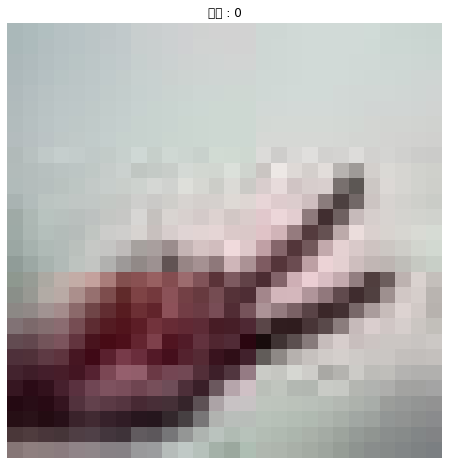

In [30]:
rsp_clf.one_image_show(x_train[0], y_train[0])

In [32]:
model = rsp_clf.make_model(x_train, y_train)

Epoch 1/100
79/79 - 4s - loss: 0.8553 - accuracy: 0.5464 - val_loss: 2.7980 - val_accuracy: 0.0000e+00
Epoch 2/100
79/79 - 0s - loss: 0.7511 - accuracy: 0.6599 - val_loss: 2.5285 - val_accuracy: 0.0000e+00
Epoch 3/100
79/79 - 0s - loss: 0.6246 - accuracy: 0.7516 - val_loss: 3.0236 - val_accuracy: 0.0000e+00
Epoch 4/100
79/79 - 0s - loss: 0.5341 - accuracy: 0.7996 - val_loss: 2.9966 - val_accuracy: 0.0000e+00
Epoch 5/100
79/79 - 0s - loss: 0.4548 - accuracy: 0.8349 - val_loss: 2.4892 - val_accuracy: 0.0000e+00
Epoch 6/100
79/79 - 0s - loss: 0.4188 - accuracy: 0.8496 - val_loss: 2.6300 - val_accuracy: 0.0000e+00
Epoch 7/100
79/79 - 0s - loss: 0.3722 - accuracy: 0.8647 - val_loss: 2.7475 - val_accuracy: 0.0380
Epoch 8/100
79/79 - 0s - loss: 0.3251 - accuracy: 0.8762 - val_loss: 2.4115 - val_accuracy: 0.0481
Epoch 9/100
79/79 - 0s - loss: 0.2997 - accuracy: 0.8929 - val_loss: 2.3391 - val_accuracy: 0.0528
Epoch 10/100
79/79 - 0s - loss: 0.2869 - accuracy: 0.8964 - val_loss: 2.2986 - val_ac